## Code to create directed graphs

## with self loops, no multiedges

In [1]:
import networkx as nx
import numpy as np

In [2]:
path = "D:\\Academics\\Introduction to Data Science\\project\\data\\"

node_arr = []
edge_arr = []
G_init = nx.DiGraph()
d = {}
for year in range(2009, 2012):
    for month in range(1,13):
        f1 = open(path +str(year)+"\\"+ 'outputs' + str(year) + '_' + str(month) + '.txt', 'r')
        f = open(path +str(year)+"\\"+ 'inputs' + str(year) + '_' + str(month) + '.txt', 'r')
        data = f1.readlines()
        for trnx in data:
            trnx = trnx[:-1].split("\t")
            ind=0
            for i in range(2, len(trnx), 2):
                if G_init.has_edge(trnx[1], trnx[i]):
                    G_init[trnx[1]][trnx[i]]['weight'] += float(trnx[i+1])/10**8
                    d[(trnx[1], str(ind))] = [trnx[i], G_init[trnx[1]][trnx[i]]['weight']]
                else:
                    d[(trnx[1], str(ind))] = [trnx[i], float(trnx[i+1])/10**8]
                    G_init.add_edge(trnx[1], trnx[i], weight = float(trnx[i+1])/10**8)
                ind+=1
        data = f.readlines()
        for trnx in data:
            trnx = trnx[:-1].split("\t")
            in_addr_cost = []
            f=0
            for i in range(2, len(trnx), 2):
                try:
                    in_addr_cost.append(d[(trnx[i], trnx[i+1])])
                except:
                    f=1
            neigh = list(G_init.neighbors(trnx[1]))
            outcost = np.array([G_init[trnx[1]][v]['weight'] for v in neigh])
            if f==1:
                if in_addr_cost == []:
                    in_addr_cost.append(['unknown', sum(outcost)])
                else: 
                    s = sum(map(float, np.array(in_addr_cost)[:,1]))
                    in_addr_cost.append(['unknown', sum(outcost)-s])

            in_addr_cost = np.array(in_addr_cost).transpose()
            s = sum(map(float, list(in_addr_cost[1])))
            in_addr_cost[1] = np.array(list(map(float, in_addr_cost[1])))/s
            G_init.remove_node(trnx[1])
            for i in range(len(in_addr_cost[1])):
                costs = float(in_addr_cost[1][0])*outcost
                for j in range(len(neigh)):
                    if in_addr_cost[0][i]!='noaddress' and in_addr_cost[0][i] !='unknown' and neigh[j]!='noaddress' and neigh[j]!='unknown':
                        if G_init.has_edge(in_addr_cost[0][i], neigh[j]):
                            G_init[in_addr_cost[0][i]][neigh[j]]['weight'] += float(costs[j])
                        else:
                            G_init.add_edge(in_addr_cost[0][i], neigh[j], weight = float(costs[j]))

        if('noaddress' in G_init):
            G_init.remove_node('noaddress')
        if('unknown' in G_init):
            G_init.remove_node('unknown')
        print(G_init.number_of_nodes(), G_init.number_of_edges(), year, month)
        node_arr.append(G_init.number_of_nodes())
        edge_arr.append(G_init.number_of_edges())
        nx.write_graphml(G_init, path + "DG_NME\\" + str(year) + "_" + str(month) + ".graphml")

2 0 2009 1
8 3 2009 2
8 3 2009 3
12 4 2009 4
19 6 2009 5
21 7 2009 6
24 7 2009 7
25 7 2009 8
25 8 2009 9
30 14 2009 10
35 19 2009 11
51 25 2009 12
67 39 2010 1
105 65 2010 2
145 90 2010 3
3515 6618 2010 4
3744 7017 2010 5
4407 8059 2010 6
21652 34246 2010 7
27572 43216 2010 8
35493 56246 2010 9
44716 72932 2010 10
58543 97455 2010 11
73553 119054 2010 12
102375 170422 2011 1
154531 254398 2011 2
235040 402324 2011 3
320660 584962 2011 4
502030 975407 2011 5
926342 1948636 2011 6
1408276 2911789 2011 7
1784883 3722498 2011 8
2054950 4448945 2011 9
2256466 4967446 2011 10
2443383 5457987 2011 11
2605279 5902844 2011 12


In [ ]:
# No multi edges without self loops directed graphs
# 2 0 2009 1
# 8 2 2009 2
# 8 2 2009 3
# 12 3 2009 4
# 19 5 2009 5
# 21 6 2009 6
# 24 6 2009 7
# 25 6 2009 8
# 25 7 2009 9
# 30 12 2009 10
# 35 16 2009 11
# 51 22 2009 12
# 67 34 2010 1
# 105 58 2010 2
# 145 83 2010 3
# 3515 6605 2010 4
# 3744 6999 2010 5
# 4407 8031 2010 6
# 21652 34184 2010 7
# 27572 43130 2010 8
# 35493 56145 2010 9
# 44716 72816 2010 10
# 58543 97311 2010 11
# 73553 118873 2010 12
# 102375 170200 2011 1
# 154531 254104 2011 2
# 235040 401939 2011 3
# 320660 584466 2011 4
# 502030 974774 2011 5
# 926342 1947709 2011 6
# 1408276 2910511 2011 7
# 1784883 3720885 2011 8
# 2054950 4447011 2011 9
# 2256466 4965297 2011 10
# 2443383 5455608 2011 11

In [ ]:
# No multi edges with self loops directed graphs
# 2 0 2009 1
# 8 3 2009 2
# 8 3 2009 3
# 12 4 2009 4
# 19 6 2009 5
# 21 7 2009 6
# 24 7 2009 7
# 25 7 2009 8
# 25 8 2009 9
# 30 14 2009 10
# 35 19 2009 11
# 51 25 2009 12
# 67 39 2010 1
# 105 65 2010 2
# 145 90 2010 3
# 3515 6618 2010 4
# 3744 7017 2010 5
# 4407 8059 2010 6
# 21652 34246 2010 7
# 27572 43216 2010 8
# 35493 56246 2010 9
# 44716 72932 2010 10
# 58543 97455 2010 11
# 73553 119054 2010 12
# 102375 170422 2011 1
# 154531 254398 2011 2
# 235040 402324 2011 3
# 320660 584962 2011 4
# 502030 975407 2011 5
# 926342 1948636 2011 6
# 1408276 2911789 2011 7
# 1784883 3722498 2011 8
# 2054950 4448945 2011 9
# 2256466 4967446 2011 10
# 2443383 5457987 2011 11
# 2605279 5902844 2011 12

In [3]:
x = []
count = 1
for year in range(2009, 2012):
    for month in range(1,13):
#         x.append(str(year) + "_" + str(month))
        x.append(count)
        count+=1

Text(0, 0.5, 'Number of nodes')

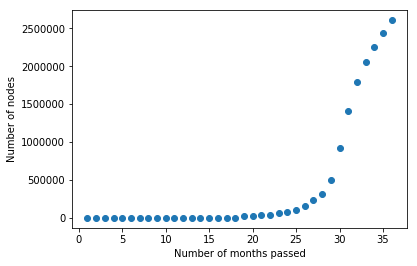

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x, node_arr)
plt.xlabel("Number of months passed")
plt.ylabel("Number of nodes")

Text(0, 0.5, 'Number of edges')

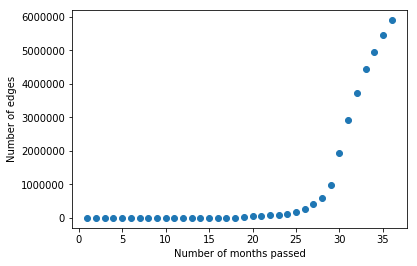

In [6]:
plt.scatter(x, edge_arr)
plt.xlabel("Number of months passed")
plt.ylabel("Number of edges")

## without self loops and multi-edges

In [ ]:
path = "D:\\Academics\\Introduction to Data Science\\project\\data\\"

node_arr = []
edge_arr = []
G_init = nx.MultiDiGraph()
d = {}
for year in range(2009, 2012):
    for month in range(1,13):
        f1 = open(path +str(year)+"\\"+ 'outputs' + str(year) + '_' + str(month) + '.txt', 'r')
        f = open(path +str(year)+"\\"+ 'inputs' + str(year) + '_' + str(month) + '.txt', 'r')
        data = f1.readlines()
        for trnx in data:
            trnx = trnx[:-1].split("\t")
            ind=0
            for i in range(2, len(trnx), 2):
                if G_init.has_edge(trnx[1], trnx[i]):
                    G_init[trnx[1]][trnx[i]][0]['weight'] += float(trnx[i+1])/10**8
                    d[(trnx[1], str(ind))] = [trnx[i], G_init[trnx[1]][trnx[i]][0]['weight']]
                else:
                    d[(trnx[1], str(ind))] = [trnx[i], float(trnx[i+1])/10**8]
                    G_init.add_edge(trnx[1], trnx[i], weight = float(trnx[i+1])/10**8)
                ind+=1
        data = f.readlines()
        for trnx in data:
            trnx = trnx[:-1].split("\t")
            in_addr_cost = []
            f=0
            for i in range(2, len(trnx), 2):
                try:
                    in_addr_cost.append(d[(trnx[i], trnx[i+1])])
                except:
                    f=1
            neigh = list(G_init.neighbors(trnx[1]))
            outcost = np.array([G_init[trnx[1]][v][0]['weight'] for v in neigh])
            if f==1:
                if in_addr_cost == []:
                    in_addr_cost.append(['unknown', sum(outcost)])
                else: 
                    s = sum(map(float, np.array(in_addr_cost)[:,1]))
                    in_addr_cost.append(['unknown', sum(outcost)-s])

            in_addr_cost = np.array(in_addr_cost).transpose()
            s = sum(map(float, list(in_addr_cost[1])))
            in_addr_cost[1] = np.array(list(map(float, in_addr_cost[1])))/s
            G_init.remove_node(trnx[1])
            for i in range(len(in_addr_cost[1])):
                costs = float(in_addr_cost[1][0])*outcost
                for j in range(len(neigh)):
                    if in_addr_cost[0][i]!='noaddress' and in_addr_cost[0][i] !='unknown' and neigh[j]!='noaddress' and neigh[j]!='unknown':
                        G_init.add_edge(in_addr_cost[0][i], neigh[j], weight = float(costs[j]))

        if('noaddress' in G_init):
            G_init.remove_node('noaddress')
        if('unknown' in G_init):
            G_init.remove_node('unknown')
        print(G_init.number_of_nodes(), G_init.number_of_edges(), year, month)
        node_arr.append(G_init.number_of_nodes())
        edge_arr.append(G_init.number_of_edges())
        nx.write_graphml(G_init, path + "DG_ME\\" + str(year) + "_" + str(month) + ".graphml")

2 0 2009 1
8 5 2009 2
8 5 2009 3
12 6 2009 4
19 8 2009 5
21 9 2009 6
24 9 2009 7
25 9 2009 8
25 10 2009 9
30 19 2009 10
35 34 2009 11
51 47 2009 12
67 72 2010 1
105 106 2010 2
145 153 2010 3
3515 7096 2010 4
3744 9535 2010 5
4407 11785 2010 6
21652 47476 2010 7
27572 60788 2010 8
35493 75866 2010 9
44716 94214 2010 10
58543 171227 2010 11
73553 194866 2010 12
102375 259964 2011 1
154531 354561 2011 2
235040 553108 2011 3
320660 835961 2011 4
502030 1375717 2011 5
926342 2666297 2011 6
1408276 3910720 2011 7
1784883 4947599 2011 8
2054950 5873904 2011 9
2256466 6547657 2011 10
2443383 7198618 2011 11
2605279 7847463 2011 12


In [ ]:
# 2 0 2009 1
# 8 5 2009 2
# 8 5 2009 3
# 12 6 2009 4
# 19 8 2009 5
# 21 9 2009 6
# 24 9 2009 7
# 25 9 2009 8
# 25 10 2009 9
# 30 19 2009 10
# 35 34 2009 11
# 51 47 2009 12
# 67 72 2010 1
# 105 106 2010 2
# 145 153 2010 3
# 3515 7096 2010 4
# 3744 9535 2010 5
# 4407 11785 2010 6
# 21652 47476 2010 7
# 27572 60788 2010 8
# 35493 75866 2010 9
# 44716 94214 2010 10
# 58543 171227 2010 11
# 73553 194866 2010 12
# 102375 259964 2011 1
# 154531 354561 2011 2
# 235040 553108 2011 3
# 320660 835961 2011 4
# 502030 1375717 2011 5
# 926342 2666297 2011 6
# 1408276 3910720 2011 7
# 1784883 4947599 2011 8
# 2054950 5873904 2011 9
# 2256466 6547657 2011 10
# 2443383 7198618 2011 11
# 2605279 7847463 2011 12

In [26]:
# G_init['6b0f8a73a56c04b519f1883e8aafda643ba61a30bd1439969df21bea5f4e27e2']['noaddress']

AtlasView({0: {'weight': 25.0}})

In [ ]:
x = []
count = 1
for year in range(2009, 2012):
    for month in range(1,13):
#         x.append(str(year) + "_" + str(month))
        x.append(count)
        count+=1

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x, node_arr)
plt.xlabel("Number of months passed")
plt.ylabel("Number of nodes")

In [ ]:
plt.scatter(x, edge_arr)
plt.xlabel("Number of months passed")
plt.ylabel("Number of edges")